In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
y_preds = np.load('./models/y_preds-synthetic-Memory.npy')
y_test = np.load('./models/y_test-synthetic-Memory.npy')

In [200]:
def test_adaptability_label(model, label, safety_factor=0.1, multiplier=1.0, start = 0, end = None):

    y_test = np.load(f'./models/y_test-{model}-{label}.npy')
    y_preds = np.load(f'./models/y_preds-{model}-{label}.npy')
    y_preds = y_preds * (1 + safety_factor)

    y_preds = y_preds.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    print(np.max(y_test))
    print(np.mean(y_test))

    maxLoad = np.max(y_test) * multiplier
    y_preds = np.where(y_preds > maxLoad, maxLoad, y_preds)
    
    maxLoadArr = np.full((len(y_test), 1), maxLoad)

    unutilized_max = np.sum(maxLoadArr - y_test)
    hours_below_load_max = np.sum(np.where(y_test > maxLoadArr, 1, 0))
    lost_load_max = np.sum(np.where(y_test > maxLoadArr, y_test - maxLoadArr, 0))


    unutilized_pred = np.sum(np.where(y_preds > y_test, y_preds - y_test, 0))
    hours_below_load_pred = np.sum(np.where(y_test > y_preds, 1, 0))
    lost_load_pred = np.sum(np.where(y_test > y_preds, y_test - y_preds, 0))

    total_resources_saved_percent = np.sum((maxLoadArr - y_preds) / np.sum(maxLoadArr)) * 100

    lost_load_percent = lost_load_pred / sum(y_test) * 100

    print(f'Total Resources Saved: {total_resources_saved_percent}%')
    print(f'Lost Load: {lost_load_percent}%')
    print(f'Served Load: {100 - lost_load_percent}%')

    print(f'Hours below load Policy Pred: {hours_below_load_pred}')
    print(f'Lost load Policy Pred: {lost_load_pred}')

    #plot them
    if end is None:
        end = len(y_test)

    plt.figure(figsize=(20,10))
    plt.plot(y_test[start:end], label='Actual Load')
    plt.plot(y_preds[start:end], label='Policy Prediction')
    plt.plot(maxLoadArr[start:end], label='Max Load')

    plt.ylim(0, 1.1 * maxLoad)
    plt.xlabel('Time (hours)')
    plt.ylabel(label)
    plt.legend()

    plt.show()

    print(np.count_nonzero(np.where(y_test == maxLoadArr, 1, 0)))

    return total_resources_saved_percent, hours_below_load_pred, lost_load_percent[0]

def test_adaptability(model, safety_factor=0.1, multiplier=1.0, start = 0, end = None):

    print("CPU")
    UR_CPU, LOL_CPU, QNS_CPU = test_adaptability_label(model, 'CPUTime', safety_factor=safety_factor, multiplier=multiplier, start = start, end = end)

    print("Memory")
    UR_MEM, LOL_MEM, QNS_MEM = test_adaptability_label(model, 'Memory', safety_factor=safety_factor, multiplier=multiplier, start = start, end = end)

    print("NProcs")
    UR_NProcs, LOL_NProcs, QNS_NProcs = test_adaptability_label(model, 'NProcs', safety_factor=safety_factor, multiplier=multiplier, start = start, end = end)
    
    
    print(f'CPU & {UR_CPU:.4f} & {LOL_CPU} & {QNS_CPU:.4f} \\\\')
    print(f'Memory & {UR_MEM:.4f} & {LOL_MEM} & {QNS_MEM:.4f} \\\\')
    print(f'NProcs & {UR_NProcs:.4f} & {LOL_NProcs} & {QNS_NProcs:.4f} \\\\')
    



CPU
78519176.0
23075998.0
Total Resources Saved: 63.737659165375035%
Lost Load: [0.11788502]%
Served Load: [99.88212]%
Hours below load Policy Pred: 21
Lost load Policy Pred: 47632652.0


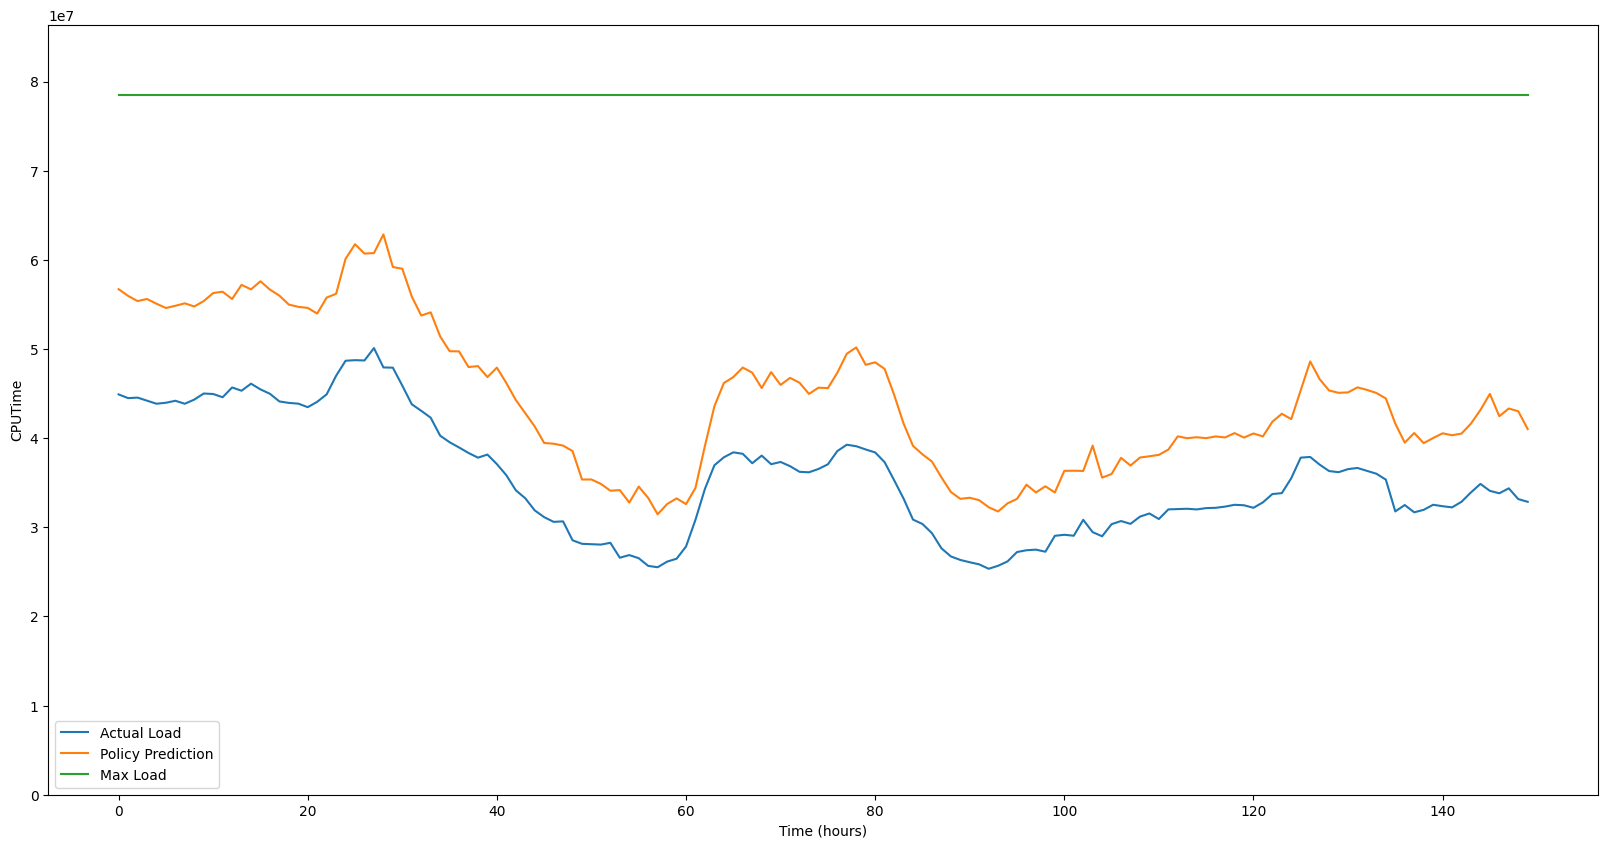

1
Memory
423045280.0
132753980.0
Total Resources Saved: 60.614583019666846%
Lost Load: [0.28800803]%
Served Load: [99.71199]%
Hours below load Policy Pred: 38
Lost load Policy Pred: 669481024.0


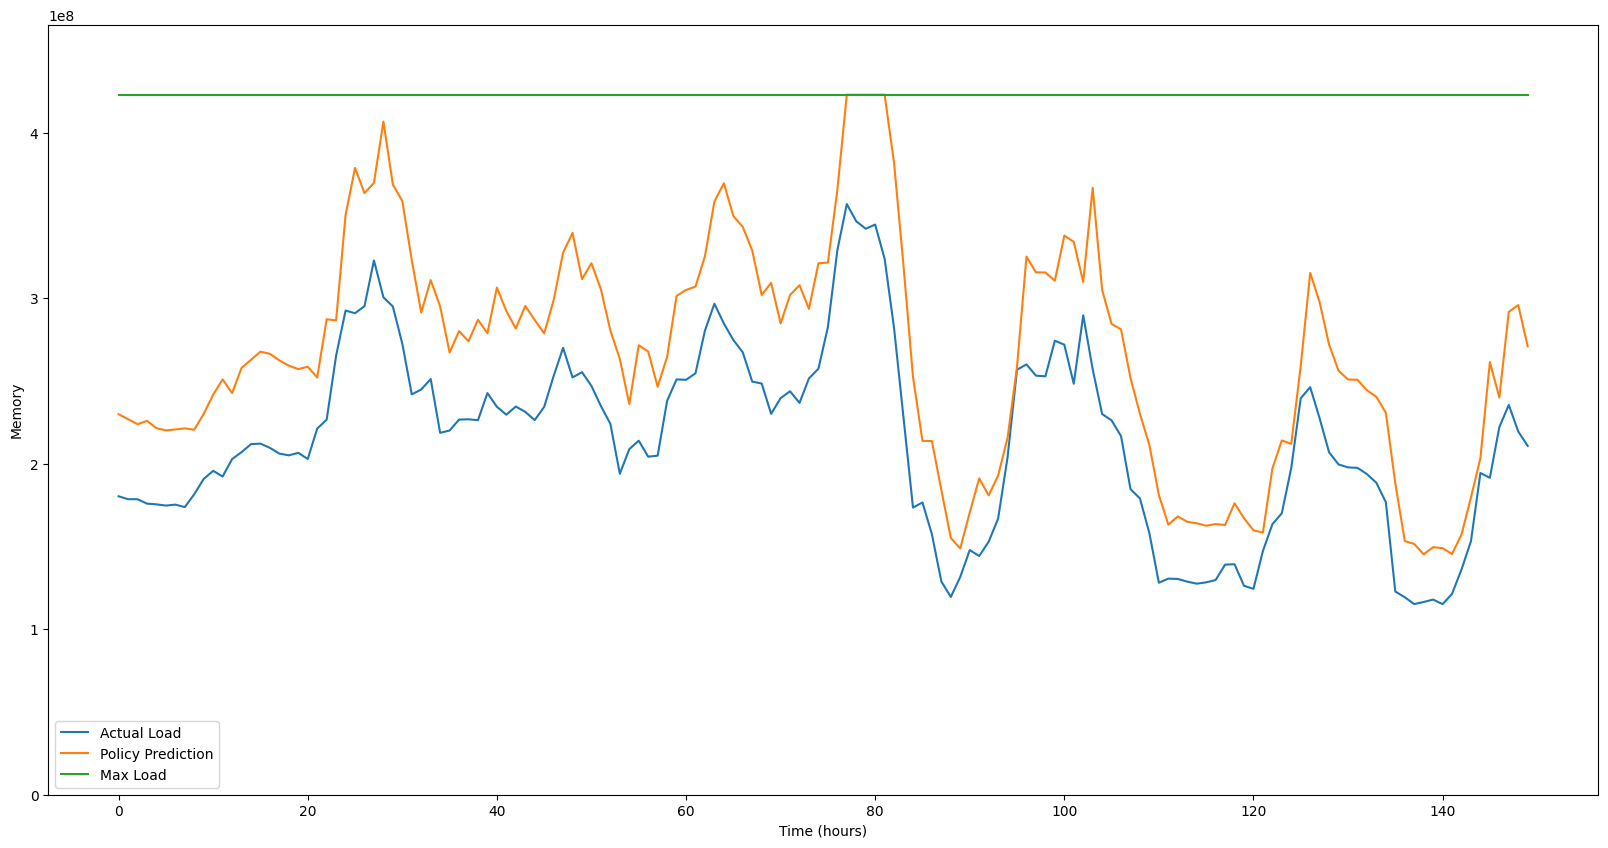

1
NProcs
895.0
271.88522
Total Resources Saved: 61.927425862385554%
Lost Load: [0.17071961]%
Served Load: [99.82928]%
Hours below load Policy Pred: 32
Lost load Policy Pred: 812.74658203125


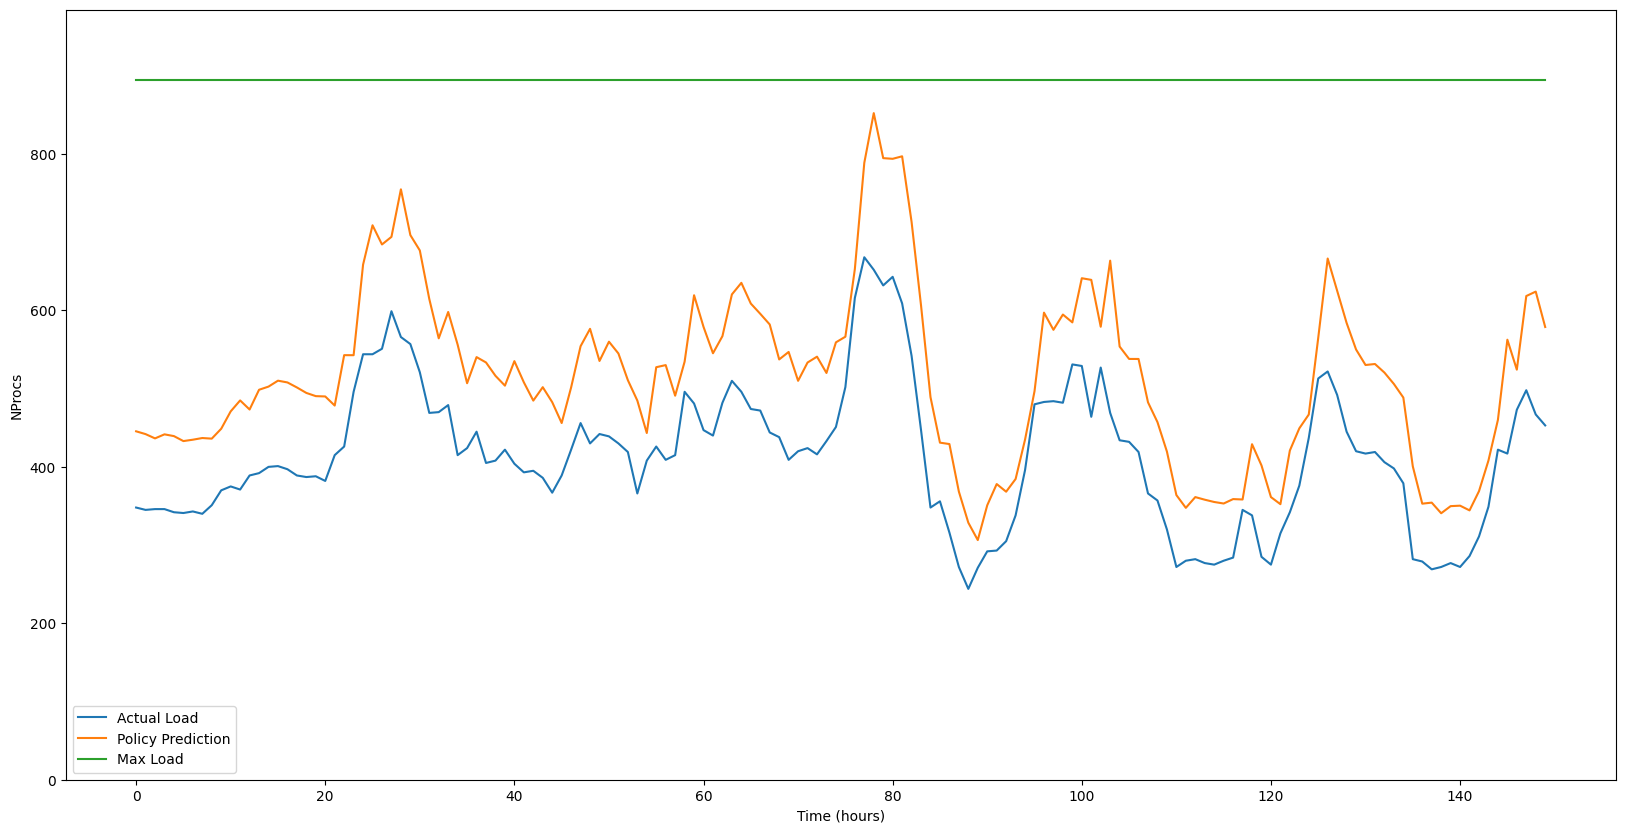

1
CPU & 63.7377 & 21 & 0.1179 \\
Memory & 60.6146 & 38 & 0.2880 \\
NProcs & 61.9274 & 32 & 0.1707 \\


In [205]:
test_adaptability('auvergrid', safety_factor=0.25, multiplier=1, start=900, end=1050)